In [21]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import ast
from tqdm import tqdm



def compute_fano_factors(neurons, bin_size=0.1, start_time=None, end_time=None):
    """
    Computes Fano factor for a list of neurons based on spike times.

    Parameters:
        neurons (list of list of float): List where each sublist contains spike times (in seconds) for a neuron.
        bin_size (float): Size of time bins to count spikes in (in seconds).
        start_time (float): Optional start time of the analysis window.
        end_time (float): Optional end time of the analysis window.

    Returns:
        np.ndarray: Fano factors for each neuron (NaN where mean spike count is zero).
    """
    # Determine global time range if not provided
    if start_time is None:
        start_time = min([min(spikes) for spikes in neurons if spikes])
    if end_time is None:
        end_time = max([max(spikes) for spikes in neurons if spikes])

    bins = np.arange(start_time, end_time + bin_size, bin_size)
    fano_factors = []

    for spike_times in neurons:
        spike_counts, _ = np.histogram(spike_times, bins=bins)
        mean_count = np.mean(spike_counts)
        if mean_count > 0:
            fano = np.var(spike_counts) / mean_count
        else:
            fano = np.nan
        fano_factors.append(fano)

    return np.array(fano_factors)


In [22]:
### load in the spiking data for striatum and hippocampus

DATA_PATH = r"Z:\projects\sequence_squad\revision_data\organised_data\animals\\"

# plot fano distribution
# plot firing rate


## fano filter and filter out high spiking rate 

# plot firing rate distributions


In [23]:
str_fanos = []
hpx_fanos = []
for mouse in os.listdir(DATA_PATH):
    if 'seq' in mouse:
        DATA_PATH_MOUSE = os.path.join(DATA_PATH, mouse)
        for recording in os.listdir(DATA_PATH_MOUSE):
            DATA_PATH_MOUSE_RECORDING = os.path.join(DATA_PATH_MOUSE, recording)
            probeA_path = os.path.join(DATA_PATH_MOUSE_RECORDING,r'ephys\probeA\non_curated_spikes')
            str_good_spikes = pd.read_csv(probeA_path + r'\good_units_df.csv')
            str_multi_spikes = pd.read_csv(probeA_path + r'\multiunits_df.csv')
            str_multi_spikes = str_multi_spikes[str_multi_spikes.Region == 'striatum']
            str_good_spikes = str_good_spikes[str_good_spikes.Region == 'striatum']
            # join the two dataframes together
            str_spikes = pd.concat([str_multi_spikes, str_good_spikes], ignore_index=True)
            
            probeB_path = os.path.join(DATA_PATH_MOUSE_RECORDING,r'ephys\probeB\non_curated_spikes')
            hpx_good_spikes = pd.read_csv(probeB_path + r'\good_units_df.csv')
            hpx_multi_spikes = pd.read_csv(probeB_path + r'\multiunits_df.csv')
            hpx_multi_spikes = hpx_multi_spikes[hpx_multi_spikes.Region == 'undefined']
            hpx_good_spikes = hpx_good_spikes[hpx_good_spikes.Region == 'undefined']
            # join the two dataframes together
            hpx_spikes = pd.concat([hpx_multi_spikes, hpx_good_spikes], ignore_index=True)
            
            # convert from string
            str_spike_times = [ast.literal_eval(item) for item in tqdm(str_spikes.Spike_times)]
            hpx_spike_times = [ast.literal_eval(item) for item in tqdm(hpx_spikes.Spike_times)]
            
            str_fano_vals = compute_fano_factors(str_spike_times, bin_size=0.2)
            hpx_fano_vals = compute_fano_factors(hpx_spike_times, bin_size=0.2)
            
            # Filter out NaN values (e.g., neurons with zero spike counts)
            valid_str_fanos = str_fano_vals[~np.isnan(str_fano_vals)]
            valid_hpx_fanos = hpx_fano_vals[~np.isnan(hpx_fano_vals)]
            
            # save them out
            str_fanos += [list(valid_str_fanos)]
            hpx_fanos += [list(valid_hpx_fanos)]
                        

        


100%|██████████| 270/270 [00:24<00:00, 10.96it/s]


# plot fano distribution -all neurons

Text(0.5, 1.0, 'Distribution of Fano Factors')

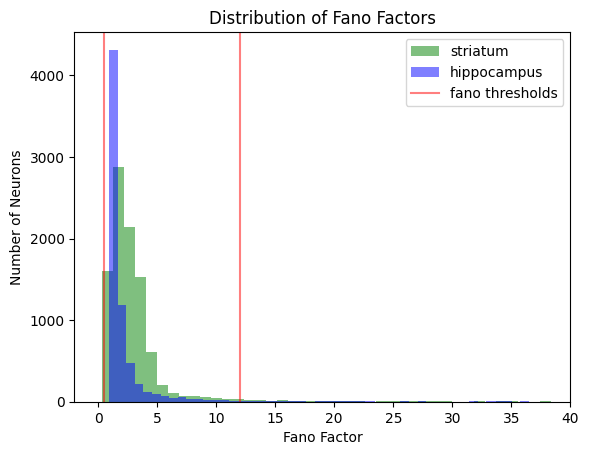

In [44]:
#flatten list
str_fanos_flat = []
for list_items in str_fanos:
    str_fanos_flat += list_items
    
#flattten list
hpx_fanos_flat = []
for list_items in hpx_fanos:
    hpx_fanos_flat += list_items

# Plot histogram
plt.hist(str_fanos_flat, bins=100, edgecolor=None,label = 'striatum', color = 'green', alpha = 0.5)
plt.hist(hpx_fanos_flat, bins=100, edgecolor=None,label = 'hippocampus', color = 'blue', alpha=0.5)
plt.xlim(-2,40)
plt.axvline(0.5, color ='red', alpha = 0.5, label = 'fano thresholds')
plt.axvline(12, color ='red', alpha = 0.5)
plt.legend()
plt.xlabel("Fano Factor")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Fano Factors")



In [57]:
firing_rate_hz = []
for neuron in str_spike_times:
    total_time = max(neuron) - min(neuron)
    firing_rate_hz += [len(neuron) / total_time]
    
hpx_firing_rate_hz = []
for neuron in hpx_spike_times:
    total_time = max(neuron) - min(neuron)
    hpx_firing_rate_hz += [len(neuron) / total_time]

Text(0.5, 1.0, 'Distribution of Firing rates')

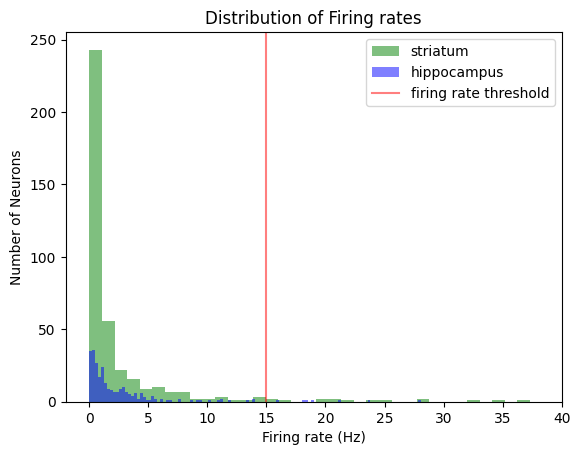

In [63]:


# Plot histogram
plt.hist(firing_rate_hz, bins=300, edgecolor=None,label = 'striatum', color = 'green', alpha = 0.5)
plt.hist(hpx_firing_rate_hz, bins=300, edgecolor=None,label = 'hippocampus', color = 'blue', alpha=0.5)
plt.xlim(-2,40)
plt.axvline(15, color ='red', alpha = 0.5, label = 'firing rate threshold')

plt.legend()
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Number of Neurons")
plt.title("Distribution of Firing rates")

90462